# Building Linear Regression 

 * Y = W*X + B
 * W = w - a * dw    ----> dw = ((-2)/n) * summation (Xi(Yi-Yipred))
 * B = b - a * db    ----> db = ((-2)/n) * summation (Yi-Yipred)

In [1]:
import numpy as np

In [2]:
class Linear_Regression():
    
# initiating the parameters (learning rate & number of iteraion)
    
    def __init__ (self,learning_rate,no_of_iterations):
        
       self.learning_rate = learning_rate
       self.no_of_iterations = no_of_iterations 
    

# fit the function to train the model with dataset    
    
    def fit (self,x,y):
       self.m , self.n = x.shape # no of rows & columns 
       
# initiating the weight & bias

       self.w = np.zeros(self.n)
       self.b = 0
       self.x = x
       self.y = y
        
# implting gradient descent 
       for i in range (self.no_of_iterations):
          self.update_weights()
            
    def update_weights(self,):
        y_prediction = self.predict(self.x)
        
# calculating the gradients
        dw = -(2*(self.x.T).dot(self.y-y_prediction))/self.m
        db = -2 * np.sum(self.y-y_prediction)/self.m
        
# updating weights 
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    def predict (self,x):
        return x.dot(self.w)+self.b

 # Using The Regression Model For Predicton

## Importing the dependencies

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

## Data preprocessing

In [4]:
data = pd.read_csv('salary_data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.shape

(30, 2)

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Splitting the features & target 

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(x)
print('-----------------------------------------')
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
-----------------------------------------
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


## Train Test Split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(30, 1) (20, 1) (10, 1)


## Training linear regression model

In [11]:
model = Linear_Regression(learning_rate = 0.02,no_of_iterations = 1000)
model.fit(x_train,y_train)

In [12]:
# printing the parameters values (w & b)
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


## Predicting the salary value for test data 

In [15]:
test_data_predection = model.predict(x_test)
print(test_data_predection)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


## Visualizing the predicting values & actual values

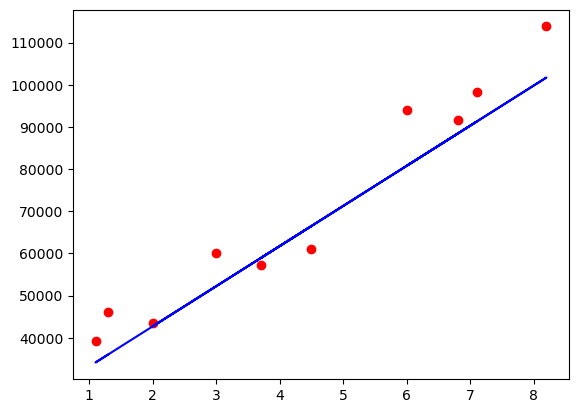

In [19]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,test_data_predection, color = 'blue')
plt.xlable = ('Work Experience')
plt.ylable = ('Salary')
plt.title = ('Salary VS Experience')
plt.show()